# Emotion Recognition - MM-LLM

## Text To Features

In [23]:
import psychai.data_visualization.chart
import psychai.data_preparation.preprocessing
import psychai.machine_learning.classification_supervise_learning
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string


import sys
current_dir = os.path.abspath('./')
sys.path.append(current_dir)

# Import any custom utilities from the parent directory (if needed)
import local_utilities

record_path = r"./results/mm_llm/csv_output/results_20241109.csv"
df_read = pd.read_csv(record_path, sep='\t')
df_read['user_id'] = df_read['file_path'].str.extract(r'PS-9_(\d{3})')[0].astype(int)
df_group = pd.read_csv('./resources/data/rct/rct.csv')
df_merged = pd.merge(df_read, df_group, on='user_id', how='left')
df_merged= df_merged.reset_index(drop=True)
df_merged

,file_path,sequence,decoded_text,user_id,Group
0,PS-9_023_23_05_22_19_40_19.mp4,6,The person in the image appears to be a young ...,23,3
1,PS-9_065_23_06_08_10_27_57.mp4,2,The person in the image appears to be a young ...,65,2
2,PS-9_081_23_06_11_16_27_54.mp4,2,The person in the image appears to be a young ...,81,3
3,PS-9_109_23_06_21_16_35_56.mp4,4,The person in the image appears to be a young ...,109,1
4,PS-9_029_23_05_23_12_46_07.mp4,9,The person in the image appears to be a young ...,29,2
...,...,...,...,...,...
889,PS-9_078_23_06_09_18_39_33.mp4,2,The person in the image appears to be a young ...,78,1
890,PS-9_029_23_05_23_12_46_07.mp4,4,The person in the image appears to be a young ...,29,2
891,PS-9_073_23_06_09_10_21_50.mp4,2,The person in the image appears to be a young ...,73,3
892,PS-9_087_23_06_10_19_26_40.mp4,3,The person in the image appears to be a young ...,87,4


In [39]:
# Download required NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # remove problematic words
    text = text.replace("<|eot_id|>", "", 1)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

# Apply preprocessing to the text data
df_merged['Processed_Text'] = df_merged['decoded_text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reclu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reclu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\reclu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\reclu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer() 

# Convert the processed text data to TF-IDF features
fitted_tfidf = tfidf.fit_transform(df_merged['Processed_Text'])

# Step 4: Convert the result to a DataFrame for easy viewing
tfidf_df = pd.DataFrame(fitted_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df)

      10   12   15  absorbed  actively  activity  add  adding  additionally  \
0    0.0  0.0  0.0       0.0       0.0       0.0  0.0     0.0           0.0   
1    0.0  0.0  0.0       0.0       0.0       0.0  0.0     0.0           0.0   
2    0.0  0.0  0.0       0.0       0.0       0.0  0.0     0.0           0.0   
3    0.0  0.0  0.0       0.0       0.0       0.0  0.0     0.0           0.0   
4    0.0  0.0  0.0       0.0       0.0       0.0  0.0     0.0           0.0   
..   ...  ...  ...       ...       ...       ...  ...     ...           ...   
889  0.0  0.0  0.0       0.0       0.0       0.0  0.0     0.0           0.0   
890  0.0  0.0  0.0       0.0       0.0       0.0  0.0     0.0           0.0   
891  0.0  0.0  0.0       0.0       0.0       0.0  0.0     0.0           0.0   
892  0.0  0.0  0.0       0.0       0.0       0.0  0.0     0.0           0.0   
893  0.0  0.0  0.0       0.0       0.0       0.0  0.0     0.0           0.0   

     adult  ...  world  worry  would  wrist  writin

In [41]:
# Step 4: Concatenate the TF-IDF DataFrame with the original df_read
df_merged_tfidf = pd.concat([df_merged.reset_index(drop=True), tfidf_df], axis=1)

df_merged_tfidf.to_csv(r"./results/mm_llm/csv_output/temp_20241113.csv")
# Display the resulting DataFrame
df_merged_tfidf.head()


,file_path,sequence,decoded_text,user_id,Group,Processed_Text,10,12,15,absorbed,...,world,worry,would,wrist,writing,written,year,yellow,yet,young
0,PS-9_023_23_05_22_19_40_19.mp4,6,The person in the image appears to be a young ...,23,3,person image appears young woman long dark hai...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.072184,0.052169
1,PS-9_065_23_06_08_10_27_57.mp4,2,The person in the image appears to be a young ...,65,2,person image appears young woman soft expressi...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.165275,0.057088,0.041259
2,PS-9_081_23_06_11_16_27_54.mp4,2,The person in the image appears to be a young ...,81,3,person image appears young man dark messy hair...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.066875,0.048332
3,PS-9_109_23_06_21_16_35_56.mp4,4,The person in the image appears to be a young ...,109,1,person image appears young woman compassionate...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.077953
4,PS-9_029_23_05_23_12_46_07.mp4,9,The person in the image appears to be a young ...,29,2,person image appears young woman black hair ba...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.041246


### Summarize

In [42]:
import numpy as np
import pandas as pd
import psychai.feature.feature_extraction.feature_processor

# Initialize the feature processor and strategies
strategies = ['mean', 'variance', 'max', 'end_to_begin']
feature_processor = psychai.feature.feature_extraction.feature_processor.FeatureProcessor()

# DataFrame to store results for each user_id
results_list = []

# Group by 'user_id' and process each user's data
for user_id, group in df_merged_tfidf.groupby('user_id'):
    # Sort the group by the 'sequence' column
    group = group.sort_values(by='sequence')
    
    # Extract features and feature names for this user
    features = group.drop(columns='user_id').values
    feature_names = group.drop(columns='user_id').columns
    
    # Summarize features using the specified strategies
    summarized_features, summarized_feature_names = feature_processor.summarize_features(features, strategies, feature_names)
    
    # Check if summarized_features is 1D; reshape if necessary
    if summarized_features.ndim == 1:
        summarized_features = summarized_features.reshape(1, -1)
    
    # Ensure the number of columns in summarized_feature_names matches summarized_features
    assert len(summarized_feature_names) == summarized_features.shape[1], "Mismatch between feature names and feature matrix shape"
    
    # Create a DataFrame for the summarized features and add 'user_id' column
    user_df = pd.DataFrame(summarized_features, columns=summarized_feature_names)
    user_df['user_id'] = user_id
    
    # Append the result to the results list
    results_list.append(user_df)

# Concatenate all user DataFrames into one final DataFrame
df_results = pd.concat(results_list, ignore_index=True)


In [43]:
# Rename specific columns
df_results = df_results.rename(columns={'mean_Group': 'Group'})

# Display the final results DataFrame
df_results.head()

,mean_sequence,Group,mean_10,mean_12,mean_15,mean_absorbed,mean_actively,mean_activity,mean_add,mean_adding,...,end_to_begin_worry,end_to_begin_would,end_to_begin_wrist,end_to_begin_writing,end_to_begin_written,end_to_begin_year,end_to_begin_yellow,end_to_begin_yet,end_to_begin_young,user_id
0,7.00,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.876868,0.830588,1
1,5.50,1.0,0.0,0.0,0.0,0.0,0.0,0.017264,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.186521,0.768911,2
2,1.75,4.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.917752,3
3,2.00,4.0,0.0,0.0,0.0,0.0,0.0,0.044905,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.741986,0.741983,4
4,5.50,1.0,0.0,0.0,0.0,0.0,0.0,0.019175,0.0,0.0,...,0.0,0.0,0.0,0.0,1.609317,0.0,0.0,0.559280,1.158657,5


In [44]:
df_results.to_csv("./results/mm_llm/csv_output/results_20241109_processed_and_merged.csv")

### Concatenate

## Emotion Classification

### Environment and Data Preparation

In [7]:
import psychai.data_visualization.chart
import psychai.data_preparation.preprocessing
import psychai.machine_learning.classification_supervise_learning
import pandas as pd
import os
import local_utilities
import local_data_loader

chart_helper = psychai.data_visualization.chart.Chart()
data_loader = local_data_loader.DataLoader()
df_mm_llm = data_loader.get_mm_llm_data_frame()

# temp = df_mm_llm.loc[:, df_mm_llm.columns.str.contains('frame')]
# temp = df_mm_llm.loc[:, df_mm_llm.columns.str.contains('Group')]
# temp  = df_mm_llm.loc[:, df_mm_llm.columns.str.contains('Group')]
# temp
# df_mm_llm = df_mm_llm.loc[:, ~df_mm_llm.columns.str.contains('sequence')]
# df_mm_llm = df_mm_llm.loc[:, ~df_mm_llm.columns.str.contains('Group')]
# # df_filtered_facial_expression = df_filtered_facial_expression[~df_filtered_facial_expression.isnull().any(axis=1)]
# df_mm_llm= df_mm_llm.reset_index(drop=True)
# df_mm_llm

#### Visualization

c:\working\programming\python\psychai_v2\psychai\psychai\data_visualization\chart.py:217: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(data1, data2, equal_var=False)
c:\working\programming\python\psychai_v2\psychai\psychai\data_visualization\chart.py:238: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, f_p_value = f_oneway(*data_groups)
c:\working\programming\python\psychai_v2\psychai\psychai\data_visualization\chart.py:217: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(data1, data2, equal_var=False)
c:\working\programming\python\psychai_v2\psychai\psychai\data_visualization\chart.py:238: SmallSampleWarning: One or more sample ar

Between-group t-test for ELVT vs CMPS on mm_llm-mean_minimalist: t=nan, p=nan
Between-group t-test for ELVT vs ADMR on mm_llm-mean_minimalist: t=nan, p=nan
Between-group t-test for ELVT vs CTRL on mm_llm-mean_minimalist: t=nan, p=nan
Between-group t-test for CMPS vs ADMR on mm_llm-mean_minimalist: t=nan, p=nan
Between-group t-test for CMPS vs CTRL on mm_llm-mean_minimalist: t=nan, p=nan
Between-group t-test for ADMR vs CTRL on mm_llm-mean_minimalist: t=nan, p=nan
Between-group t-test for ELVT vs CMPS on mm_llm-mean_happy: t=nan, p=nan
Between-group t-test for ELVT vs ADMR on mm_llm-mean_happy: t=nan, p=nan
Between-group t-test for ELVT vs CTRL on mm_llm-mean_happy: t=nan, p=nan
Between-group t-test for CMPS vs ADMR on mm_llm-mean_happy: t=nan, p=nan
Between-group t-test for CMPS vs CTRL on mm_llm-mean_happy: t=nan, p=nan
Between-group t-test for ADMR vs CTRL on mm_llm-mean_happy: t=nan, p=nan
Between-group t-test for ELVT vs CMPS on mm_llm-mean_personality: t=nan, p=nan
Between-group t

c:\working\programming\python\psychai_v2\psychai\psychai\data_visualization\chart.py:238: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, f_p_value = f_oneway(*data_groups)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values

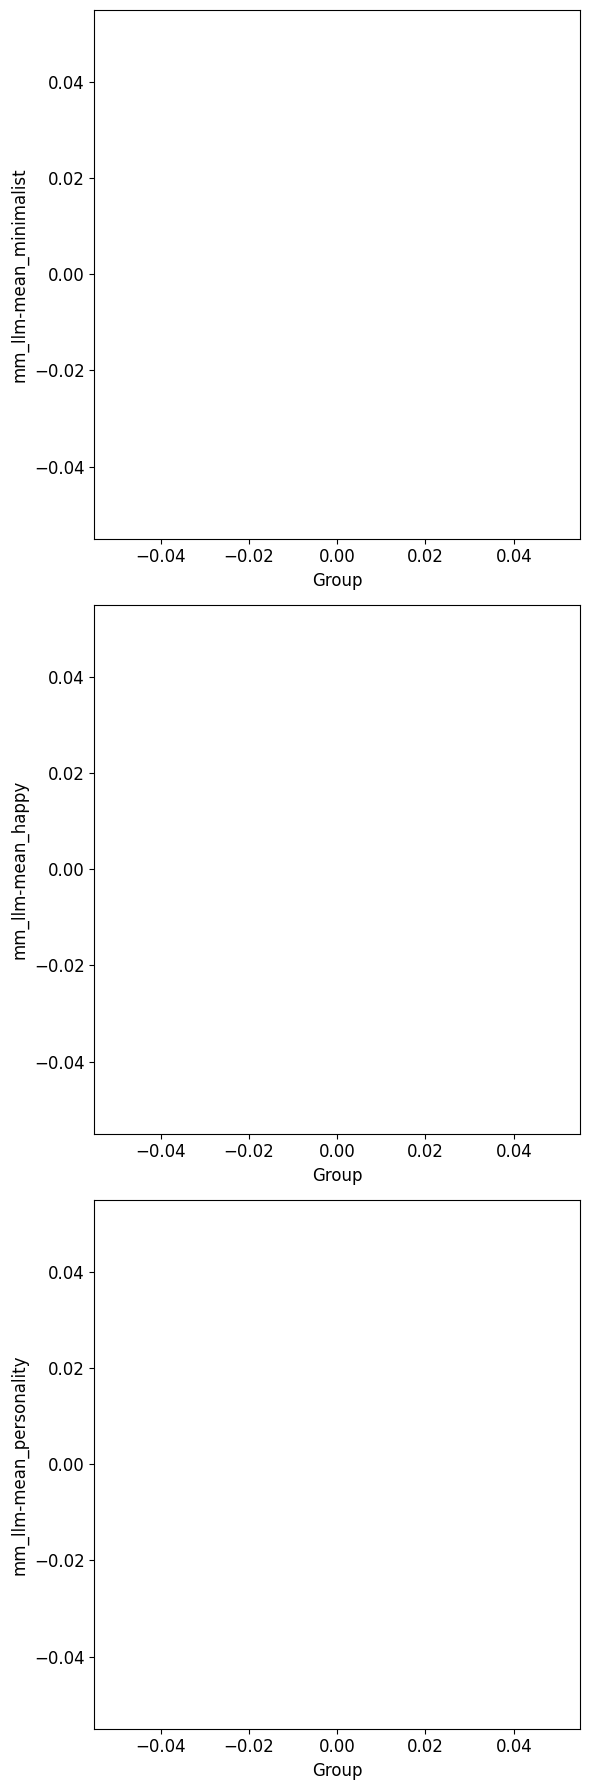

mm_llm-mean_minimalist: F(3, -4) = nan, p < 0.001
mm_llm-mean_happy: F(3, -4) = nan, p < 0.001
mm_llm-mean_personality: F(3, -4) = nan, p < 0.001


In [8]:
to_remove_outlier = True
outlier_multiplier = 1.5
do_within_group_t_test = False
group_labels = {
    1: "ELVT",
    2: "CMPS",
    3: "ADMR",
    4: "CTRL"
}
features_to_plot = ["mm_llm-mean_minimalist","mm_llm-mean_happy","mm_llm-mean_personality"]
chart_helper.draw_violin(df_mm_llm, features_to_plot, to_remove_outlier, outlier_multiplier, do_within_group_t_test, group_names = group_labels)

#### KDE

c:\working\programming\python\psychai_v2\psychai\psychai\data_visualization\chart.py:63: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=feature, hue=hue, fill=True, palette=palette_selection)
c:\working\programming\python\psychai_v2\psychai\psychai\data_visualization\chart.py:63: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=feature, hue=hue, fill=True, palette=palette_selection)
c:\working\programming\python\psychai_v2\psychai\psychai\data_visualization\chart.py:63: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=feature, hue=hue, fill=True, palette=palette_selection)


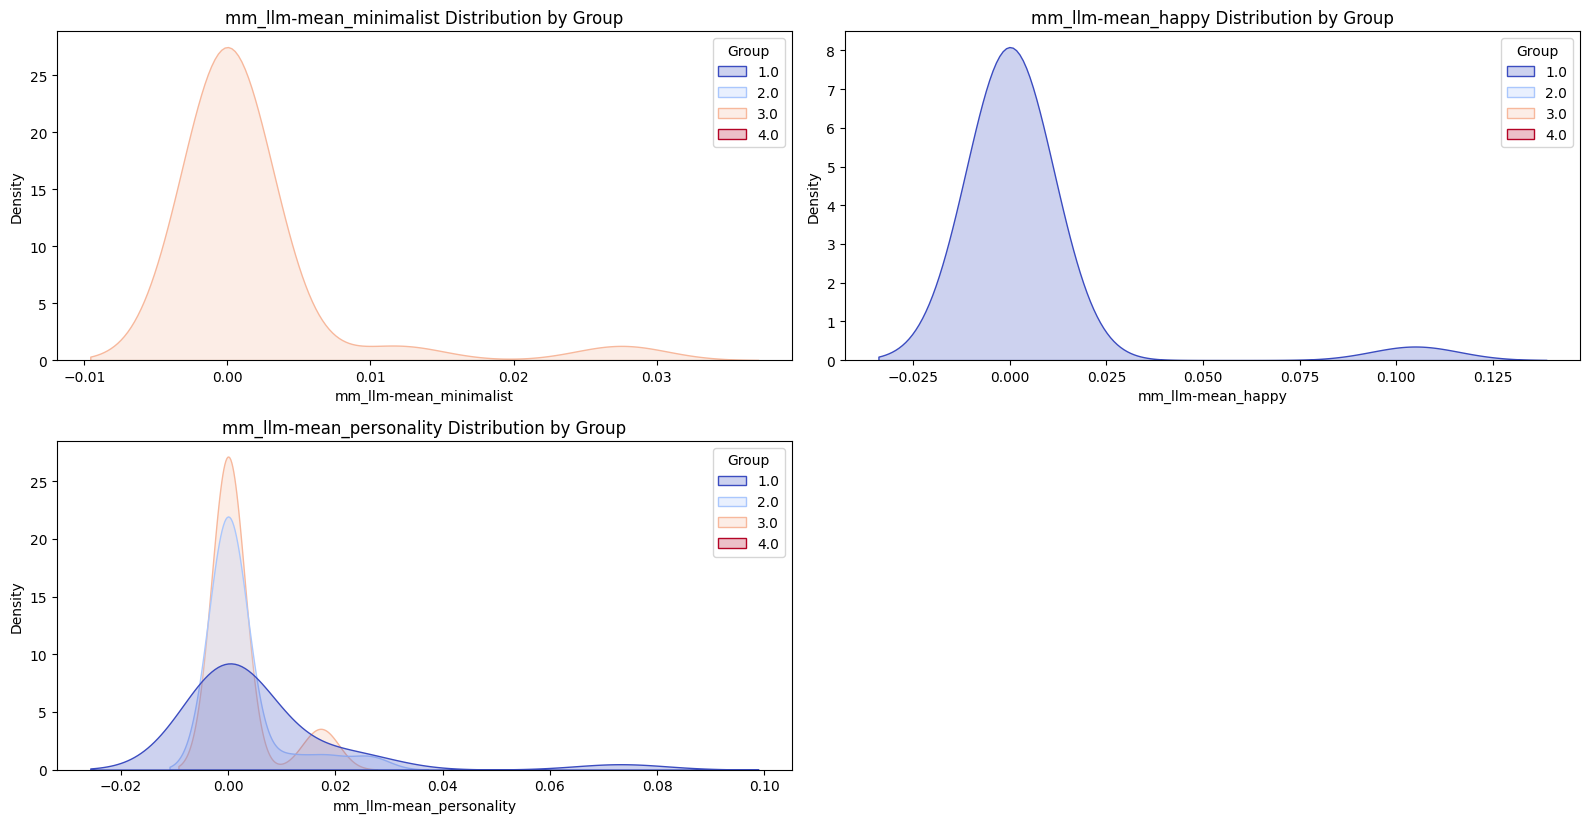

In [9]:
chart_helper.draw_kde_plot(df_mm_llm, features_to_plot=features_to_plot)

### Machine Learning

Remove outliers for 344 columns with k=1.5: 3 rows out of 100 rows removed.
Replace with Similar Median. k=1.5
Missing values in features (X): 0
Missing values in target (y): 0
Removed 78 redundant features out of 3448 total features based on correlation: ['mm_llm-variance_slow', 'mm_llm-end_to_begin_yet', 'mm_llm-end_to_begin_comfortably', 'mm_llm-variance_around', 'mm_llm-variance_meeting', 'mm_llm-mean_crow', 'mm_llm-max_inspired', 'mm_llm-end_to_begin_knee', 'mm_llm-mean_around', 'mm_llm-mean_rather', 'mm_llm-mean_bent', 'mm_llm-variance_perhaps', 'mm_llm-variance_palms', 'mm_llm-end_to_begin_language', 'mm_llm-end_to_begin_compassionate', 'mm_llm-variance_online', 'mm_llm-max_yet', 'mm_llm-mean_inspired', 'mm_llm-mean_broad', 'mm_llm-variance_grin', 'mm_llm-mean_receptiveness', 'mm_llm-variance_language', 'mm_llm-end_to_begin_creating', 'mm_llm-mean_closer', 'mm_llm-max_eyebrow', 'mm_llm-variance_associated', 'mm_llm-variance_broad', 'mm_llm-variance_inspection', 'mm_llm-variance_

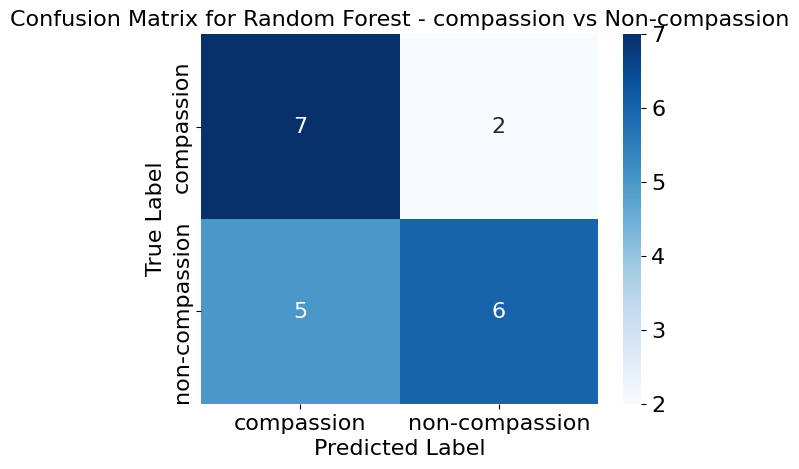

ROC-AUC for Random Forest - compassion vs Non-compassion: 0.7677


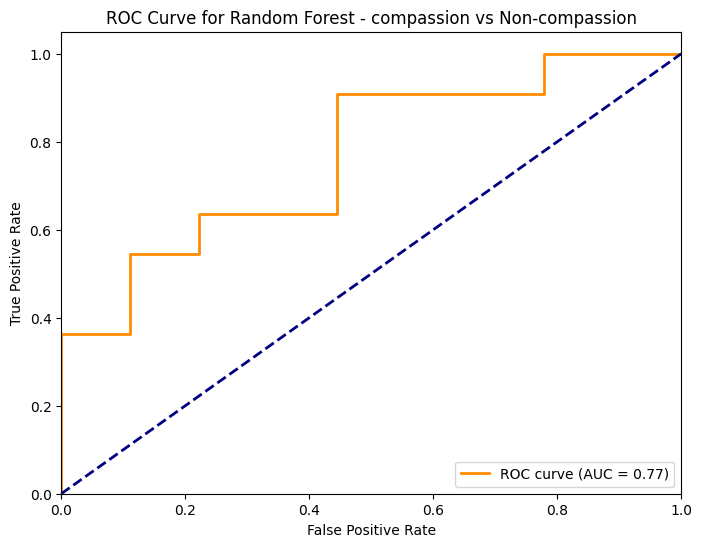

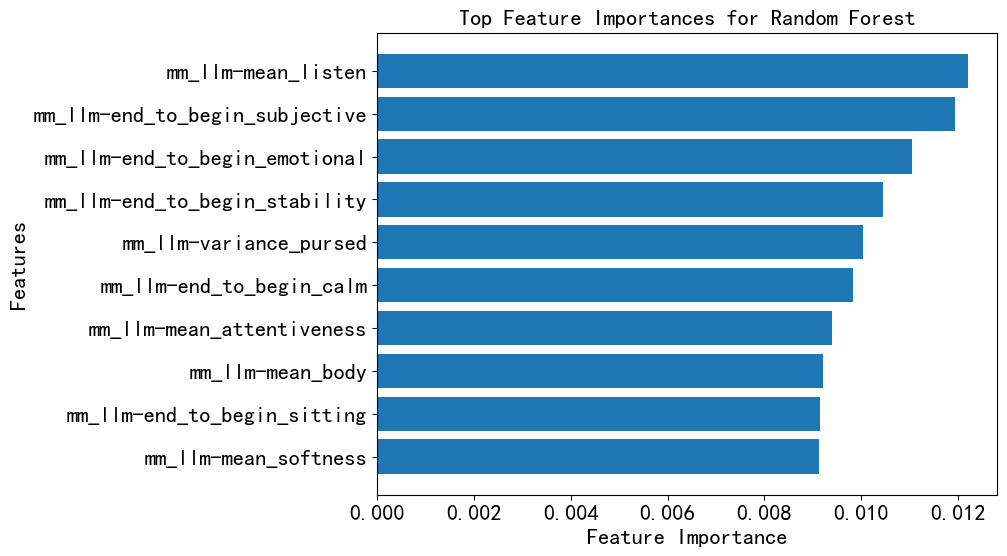

Remove outliers for 344 columns with k=1.5: 3 rows out of 100 rows removed.
Replace with Similar Median. k=1.5
Missing values in features (X): 0
Missing values in target (y): 0
Removed 78 redundant features out of 3448 total features based on correlation: ['mm_llm-variance_slow', 'mm_llm-end_to_begin_yet', 'mm_llm-end_to_begin_comfortably', 'mm_llm-variance_around', 'mm_llm-variance_meeting', 'mm_llm-mean_crow', 'mm_llm-max_inspired', 'mm_llm-end_to_begin_knee', 'mm_llm-mean_around', 'mm_llm-mean_rather', 'mm_llm-mean_bent', 'mm_llm-variance_perhaps', 'mm_llm-variance_palms', 'mm_llm-end_to_begin_language', 'mm_llm-end_to_begin_compassionate', 'mm_llm-variance_online', 'mm_llm-max_yet', 'mm_llm-mean_inspired', 'mm_llm-mean_broad', 'mm_llm-variance_grin', 'mm_llm-mean_receptiveness', 'mm_llm-variance_language', 'mm_llm-end_to_begin_creating', 'mm_llm-mean_closer', 'mm_llm-max_eyebrow', 'mm_llm-variance_associated', 'mm_llm-variance_broad', 'mm_llm-variance_inspection', 'mm_llm-variance_

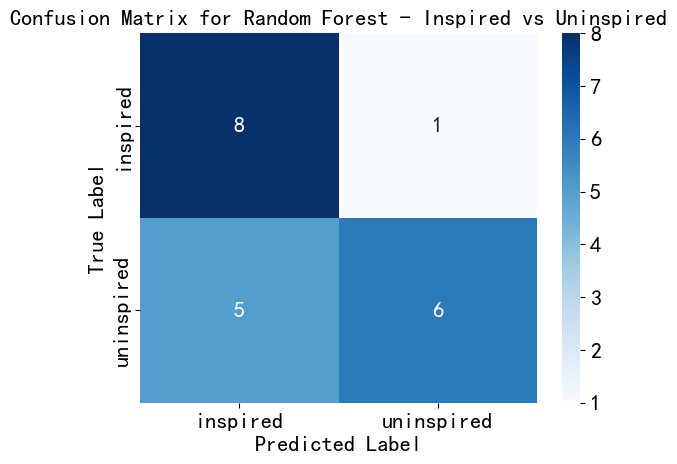

ROC-AUC for Random Forest - Inspired vs Uninspired: 0.7980


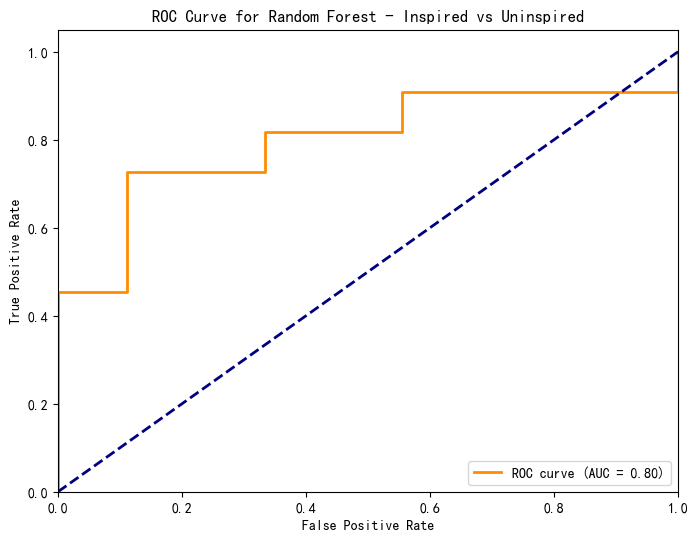

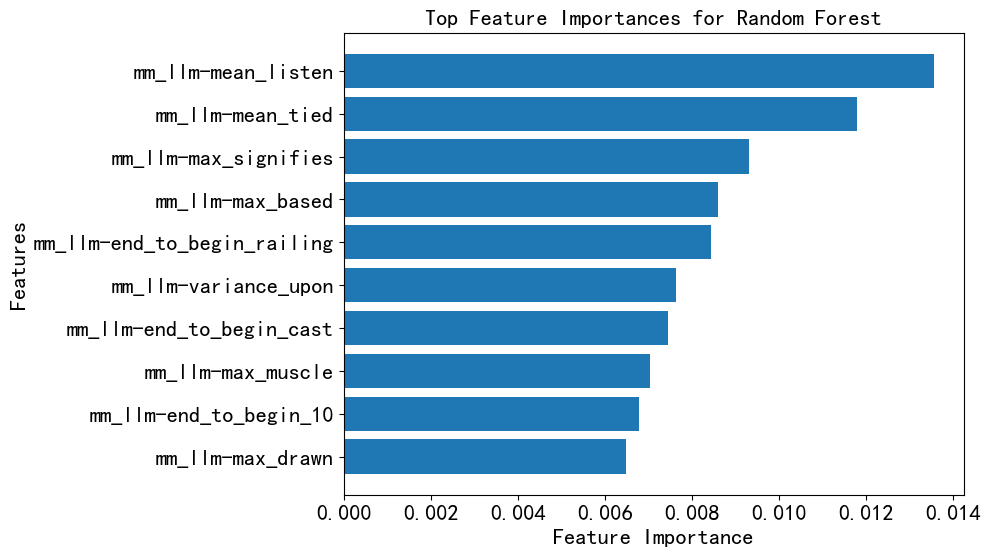

Remove outliers for 344 columns with k=1.5: 3 rows out of 100 rows removed.
Replace with Similar Median. k=1.5
Missing values in features (X): 0
Missing values in target (y): 0
Removed 78 redundant features out of 3448 total features based on correlation: ['mm_llm-variance_slow', 'mm_llm-end_to_begin_yet', 'mm_llm-end_to_begin_comfortably', 'mm_llm-variance_around', 'mm_llm-variance_meeting', 'mm_llm-mean_crow', 'mm_llm-max_inspired', 'mm_llm-end_to_begin_knee', 'mm_llm-mean_around', 'mm_llm-mean_rather', 'mm_llm-mean_bent', 'mm_llm-variance_perhaps', 'mm_llm-variance_palms', 'mm_llm-end_to_begin_language', 'mm_llm-end_to_begin_compassionate', 'mm_llm-variance_online', 'mm_llm-max_yet', 'mm_llm-mean_inspired', 'mm_llm-mean_broad', 'mm_llm-variance_grin', 'mm_llm-mean_receptiveness', 'mm_llm-variance_language', 'mm_llm-end_to_begin_creating', 'mm_llm-mean_closer', 'mm_llm-max_eyebrow', 'mm_llm-variance_associated', 'mm_llm-variance_broad', 'mm_llm-variance_inspection', 'mm_llm-variance_

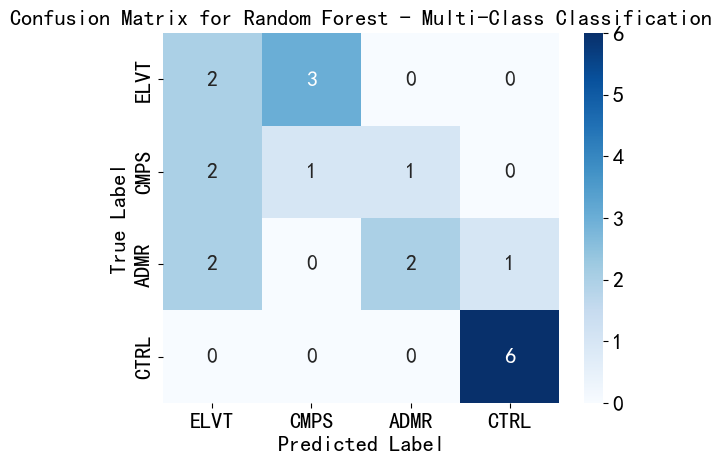

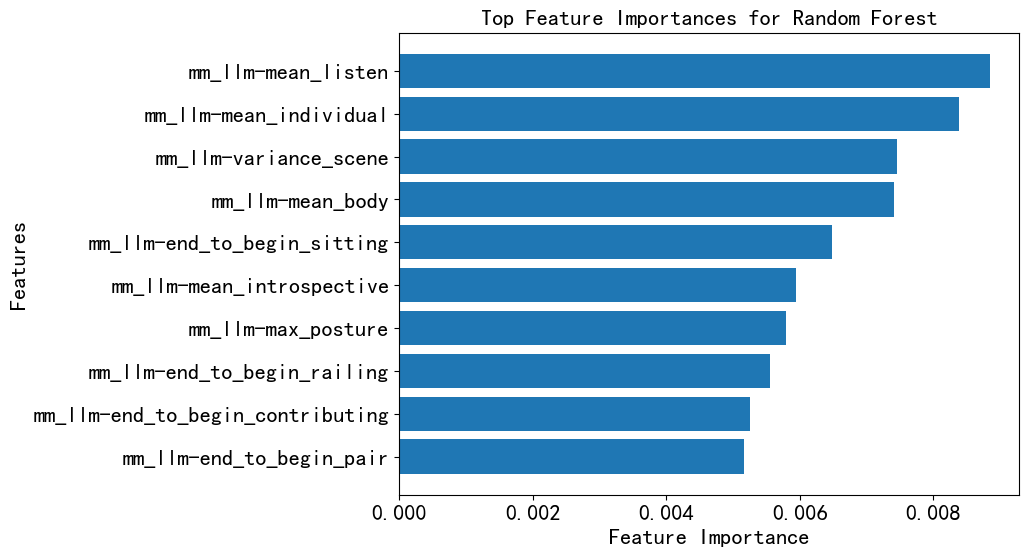

0.65 0.67 0.63 0.70 0.73 0.67 0.55 0.50 0.25 0.92 0.36


(0.65,
 {'compassion': 0.6666666666666666, 'non-compassion': 0.631578947368421},
 ['mm_llm-mean_softness',
  'mm_llm-end_to_begin_sitting',
  'mm_llm-mean_body',
  'mm_llm-mean_attentiveness',
  'mm_llm-end_to_begin_calm',
  'mm_llm-variance_pursed',
  'mm_llm-end_to_begin_stability',
  'mm_llm-end_to_begin_emotional',
  'mm_llm-end_to_begin_subjective',
  'mm_llm-mean_listen'],
 0.7,
 {'inspired': 0.7272727272727273, 'uninspired': 0.6666666666666666},
 ['mm_llm-max_drawn',
  'mm_llm-end_to_begin_10',
  'mm_llm-max_muscle',
  'mm_llm-end_to_begin_cast',
  'mm_llm-variance_upon',
  'mm_llm-end_to_begin_railing',
  'mm_llm-max_based',
  'mm_llm-max_signifies',
  'mm_llm-mean_tied',
  'mm_llm-mean_listen'],
 0.55,
 {'ADMR': 0.5,
  'CMPS': 0.25,
  'CTRL': 0.9230769230769231,
  'ELVT': 0.36363636363636365},
 ['mm_llm-end_to_begin_pair',
  'mm_llm-end_to_begin_contributing',
  'mm_llm-end_to_begin_railing',
  'mm_llm-max_posture',
  'mm_llm-mean_introspective',
  'mm_llm-end_to_begin_sitting

In [10]:
emotion_classification_task = local_utilities.EmotionClassificationTask()
# emotion_classification_task.run_emotion_classification_tasks(df_mm_llm, 
#                                                              correlation_threshold = 0.7, 
#                                                              remove_redundant_features = True,
#                                                              random_state = 1)
emotion_classification_task.run_emotion_classification_tasks(df_mm_llm, 
                                                            n_top_features= 10,
                                                            correlation_threshold = 0.9,
                                                            outlier_strategies = ["Remove Multi-Column Outlier","Replace with Similar Median"],
                                                            random_state = 42,
                                                            k = 1.5)
                

## Old

Missing values in features (X): 0
Missing values in target (y): 0
Removed 2236 redundant features based on correlation: ['mean_12', 'mean_15', 'mean_adult', 'mean_ambiance', 'mean_anger', 'mean_apartment', 'mean_attentiongrabbing', 'mean_attractive', 'mean_audiobook', 'mean_away', 'mean_bit', 'mean_boy', 'mean_branding', 'mean_brings', 'mean_button', 'mean_buttonup', 'mean_calming', 'mean_camouflage', 'mean_cardigan', 'mean_carefully', 'mean_cartoon', 'mean_certain', 'mean_challenge', 'mean_character', 'mean_child', 'mean_combed', 'mean_committed', 'mean_community', 'mean_compelling', 'mean_complex', 'mean_composureeotid', 'mean_concentrationeotid', 'mean_conducive', 'mean_considering', 'mean_consisting', 'mean_contentment', 'mean_cord', 'mean_cover', 'mean_crazy', 'mean_creativity', 'mean_creativityeotid', 'mean_crow', 'mean_cue', 'mean_darkcolored', 'mean_daydreaming', 'mean_definitive', 'mean_demonstrate', 'mean_depth', 'mean_describe', 'mean_described', 'mean_desk', 'mean_despite',

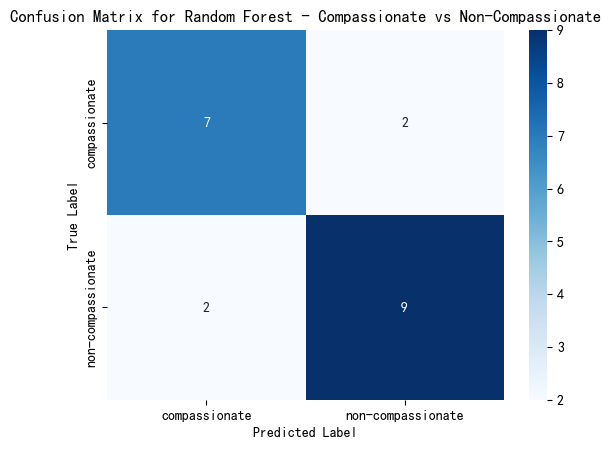

ROC-AUC for Random Forest - Compassionate vs Non-Compassionate: 0.8687


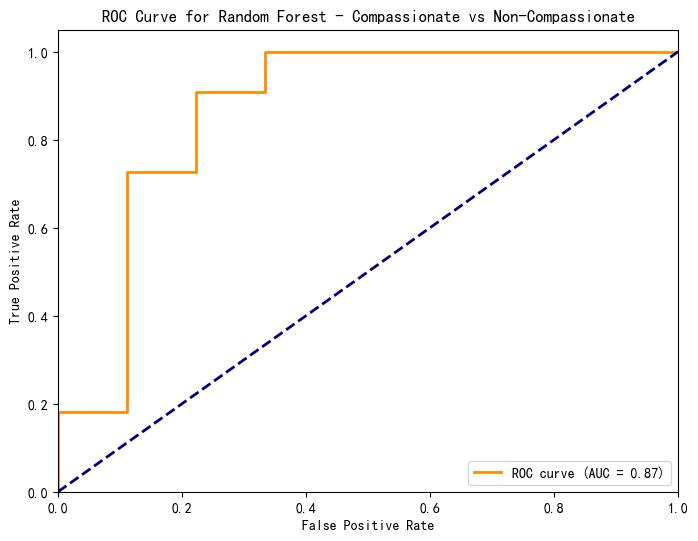

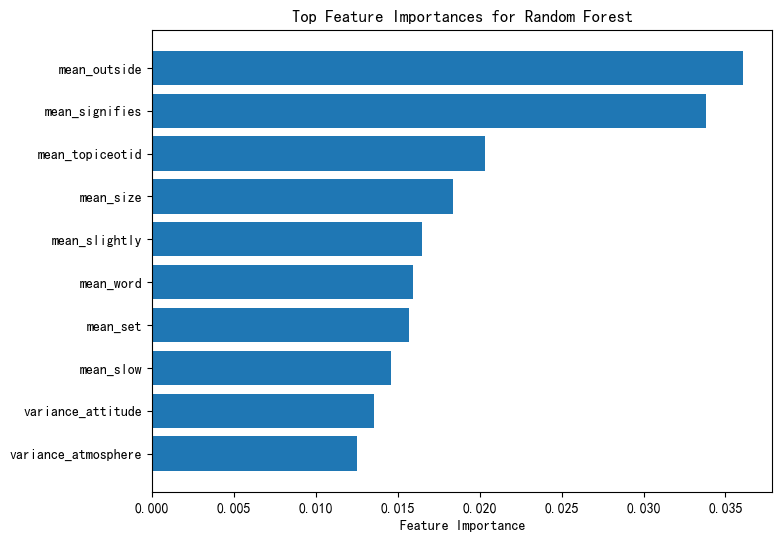

In [ ]:
# x_columns = df_results.columns[2:-1]
# y_column = "Group"

# # Task 1: Relabel for "compassionate" and "non-compassionate"
# machine_learning = local_utilities.MachineLearning(df_results)
# group_labels_task1 = {1: "compassionate", 2: "compassionate", 3: "non-compassionate", 4: "non-compassionate"}

# parameters = {
#     'n_estimators': [50, 100, 200, 300],
#     'max_depth': [3, 5, 10, None],
#     'min_samples_split': [2, 3, 5, 7],
# }
# machine_learning.run_machine_learning(group_labels_task1, "Compassionate vs Non-Compassionate",x_columns=x_columns,y_column=y_column,
#                                     explained_variance_threshold=0.95, remove_redundant_features=True, remove_low_variance=False, 
#                                     variance_threshold=0.01, use_pca=False, parameters= parameters)

# # # Task 2: Relabel for "inspired" and "un-inspired"
# # machine_learning = local_utilities.MachineLearning(df_results)
# # group_labels_task2 = {1: "inspired", 3: "inspired", 2: "uninspired", 4: "uninspired"}
# # machine_learning.run_machine_learning(group_labels_task2, "Inspired vs Uninspired",x_columns=x_columns,y_column=y_column)

# # # Task 3: Use original four group values
# # machine_learning = local_utilities.MachineLearning(df_results)
# # group_labels_task3 = {1: "compassionate-inspired", 2: "compassionate only", 3: "inspired only", 4: "control"}
# # machine_learning.run_machine_learning(group_labels_task3, "2-by-2 Analysis",x_columns=x_columns,y_column=y_column)


### Extract 

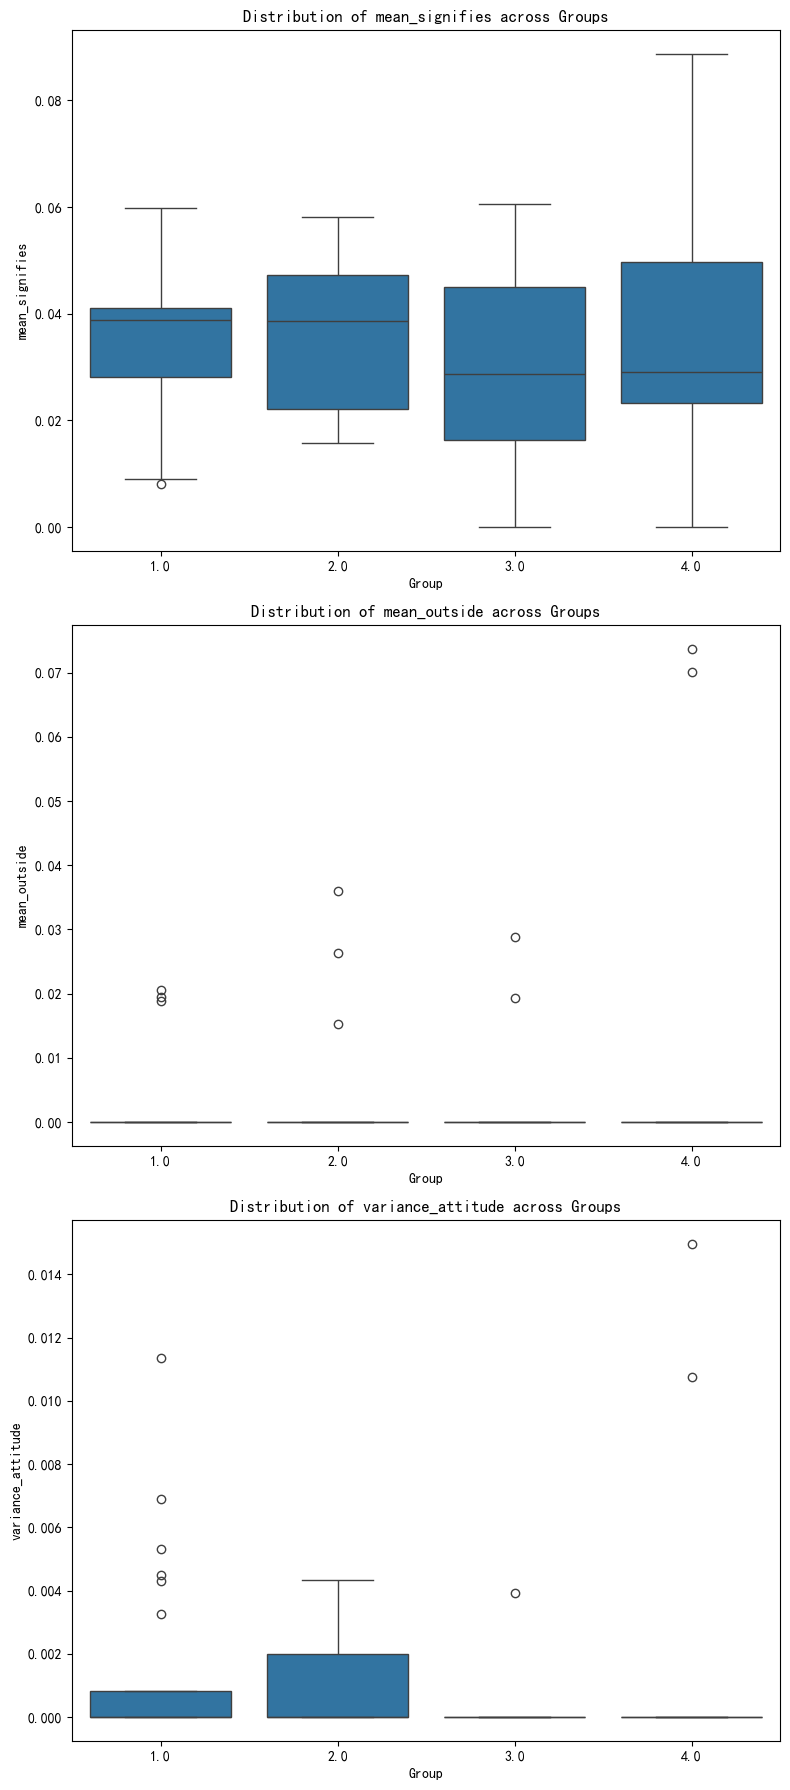

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Sample data for demonstration (replace with your actual data)
# # df = pd.DataFrame({'Group': ['A', 'B', 'A', 'C'], 'Feature1': [1, 2, 3, 4], 'Feature2': [4, 3, 2, 1]})
# # 
# features = ['mean_signifies','mean_outside','variance_attitude']

# # Initialize the plot figure
# plt.figure(figsize=(8, 6 * len(features)))

# # Loop through each feature and create a subplot for it
# for i, feature in enumerate(features, 1):
#     plt.subplot(len(features), 1, i)  # Create a subplot for each feature
    
#     # Create a boxplot to compare the feature distribution across groups
#     sns.boxplot(data=df_results, x='Group', y=feature)
    
#     # Optionally, add a title to each subplot
#     plt.title(f'Distribution of {feature} across Groups')
#     plt.xlabel('Group')
#     plt.ylabel(feature)

# # Adjust layout and show plot
# plt.tight_layout()
# plt.show()


In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of keywords to search for
# keywords = ["signifies", "outside", "attitude"]
keywords = ["signifies"]

# Define the keywords list and create a regex pattern for filtering
pattern = '|'.join(keywords)

# Filter the data to get rows that contain any of the keywords in the 'decoded_text' column
filtered_df = df_merged[df_merged['decoded_text'].str.contains(pattern, case=False, na=False)]

In [64]:
# Calculate relative frequency of each 'Group' in both datasets
all_data_relative = df_merged['Group'].value_counts(normalize=True).reset_index()
all_data_relative.columns = ['Group', 'Relative Frequency']
all_data_relative['Dataset'] = 'All Data'
all_data_relative

,Group,Relative Frequency,Dataset
0,2,0.351230,All Data
1,3,0.276286,All Data
2,1,0.270694,All Data
3,4,0.101790,All Data


In [68]:
filtered_data_relative = filtered_df['Group'].value_counts(normalize=True).reset_index()
filtered_data_relative.columns = ['Group', 'Relative Frequency']
filtered_data_relative['Dataset'] = 'Filtered Data'
filtered_data_relative

,Group,Relative Frequency,Dataset
0,2,0.380952,Filtered Data
1,1,0.274510,Filtered Data
2,3,0.240896,Filtered Data
3,4,0.103641,Filtered Data


In [70]:
# Combine both datasets into a single DataFrame for easier plotting
combined_df = pd.concat([all_data_relative, filtered_data_relative])
combined_df

,Group,Relative Frequency,Dataset
0,2,0.351230,All Data
1,3,0.276286,All Data
2,1,0.270694,All Data
3,4,0.101790,All Data
0,2,0.380952,Filtered Data
1,1,0.274510,Filtered Data
2,3,0.240896,Filtered Data
3,4,0.103641,Filtered Data


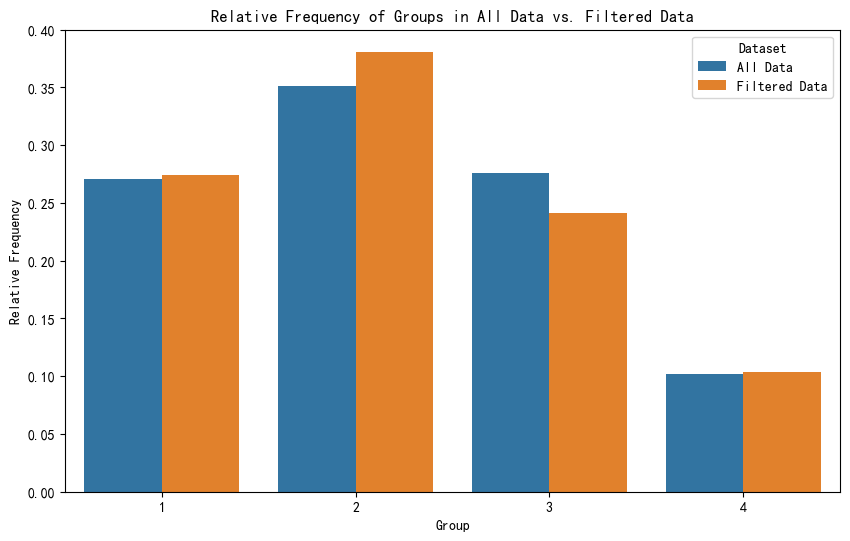

In [71]:
# Plot the relative frequency of 'Group' for both datasets as bar plots
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x='Group', y='Relative Frequency', hue='Dataset')

# Add labels and title
plt.xlabel("Group")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequency of Groups in All Data vs. Filtered Data")
plt.legend(title="Dataset")
plt.show()


In [57]:
# Define a list of keywords to search for
# keywords = ["signifies", "outside", "attitude"]
keywords = ["signifies"]

# Create a regular expression pattern to match any of the keywords
pattern = '|'.join(keywords)  # This creates a pattern like "keyword1|keyword2|keyword3"

# Filter rows where "decoded_text" contains any of the keywords
df_filtered = df_merged[df_merged['decoded_text'].str.contains(pattern, case=False, na=False)]

# Display the filtered DataFrame
print(df_filtered)

                          file_path  sequence  \
0    PS-9_023_23_05_22_19_40_19.mp4         6   
1    PS-9_065_23_06_08_10_27_57.mp4         2   
7    PS-9_053_23_06_06_16_08_40.mp4         1   
9    PS-9_082_23_06_10_13_32_51.mp4        13   
12   PS-9_083_23_06_10_13_23_14.mp4        11   
..                              ...       ...   
886  PS-9_008_23_05_22_15_25_39.mp4         5   
887  PS-9_008_23_05_22_15_25_39.mp4         2   
889  PS-9_078_23_06_09_18_39_33.mp4         2   
890  PS-9_029_23_05_23_12_46_07.mp4         4   
892  PS-9_087_23_06_10_19_26_40.mp4         3   

                                          decoded_text  user_id  Group  \
0    The person in the image appears to be a young ...       23      3   
1    The person in the image appears to be a young ...       65      2   
7    The person in the image appears to be a young ...       53      4   
9    The person in the image appears to be a young ...       82      3   
12   The person in the image appears to b

## Footnote
- Copyright：Ivan Liu 
- Last Update: 2024
- Env：psychai241104
- References: 
    - https://github.com/PrudhviGNV/Speech-Emotion-Recognization